In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Use raw string to avoid Unicode error in file path
df = pd.read_csv(r"C:\Users\dhami\Downloads\train_and_test2.csv")
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [21]:
df.rename(columns = {'2urvived':'surv'}, inplace = True) 
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,surv
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


Text(0, 0.5, 'Fare')

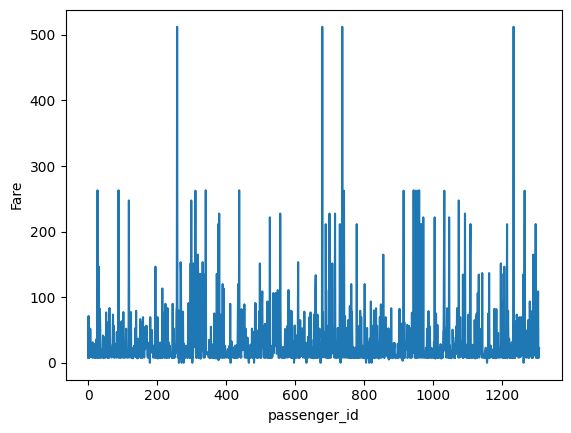

In [22]:
# aplot of the Fare 
pl = df.Fare.plot()
plt.xlabel("passenger_id")
plt.ylabel("Fare") 

1309


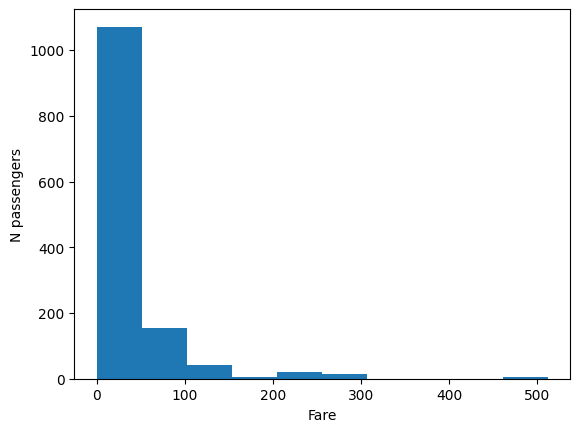

In [23]:
#and a histogram 
h1 = plt.hist(df["Fare"],bins =  10)
plt.xlabel("Fare")
plt.ylabel("N passengers")
print (len(df))

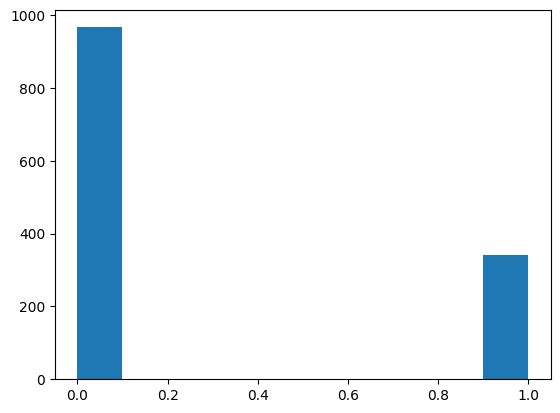

In [24]:
h2 = plt.hist(df["surv"])

In [25]:
import pandasql as psql
import pandas as pd

# Assuming df is your pandas DataFrame

query = f"SELECT Fare, Sex, Age, Embarked, sibsp, Pclass, surv FROM df"
trimmeddf = psql.sqldf(query, locals())

print(trimmeddf)


          Fare  Sex   Age  Embarked  sibsp  Pclass  surv
0       7.2500    0  22.0       2.0      1       3     0
1      71.2833    1  38.0       0.0      1       1     1
2       7.9250    1  26.0       2.0      0       3     1
3      53.1000    1  35.0       2.0      1       1     1
4       8.0500    0  35.0       2.0      0       3     0
...        ...  ...   ...       ...    ...     ...   ...
1304    8.0500    0  28.0       2.0      0       3     0
1305  108.9000    1  39.0       0.0      0       1     0
1306    7.2500    0  38.5       2.0      0       3     0
1307    8.0500    0  28.0       2.0      0       3     0
1308   22.3583    0  28.0       0.0      1       3     0

[1309 rows x 7 columns]


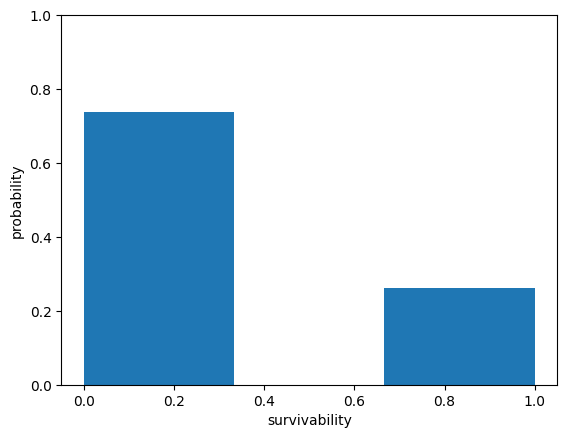

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: surv, Length: 1309, dtype: int64
<BarContainer object of 3 artists>


In [26]:
#we want to see the suvivability chances not total numbers -> make normalized histogram

x,bins, hnorm=plt.hist(trimmeddf['surv'],bins=3,density=True)
for item in hnorm:
    item.set_height(item.get_height()/sum(x))

plt.xlabel("survivability")
plt.ylabel("probability")
plt.ylim(0,1)
#hist = dff.hist("Fare",nbins=10)


plt.show()
print(trimmeddf['surv'])

print (hnorm)

In [27]:
#make acorrelation table 

numeric_columns = trimmeddf.select_dtypes(include=['float64', 'int64'])
#also for compactness good to remove track index 
#red_numcol = numeric_columns.drop('zero*',axis=1)
#red_numcol = numeric_columns.drop('id',axis=1)

correlation =numeric_columns.corr()
#print (len(nummeric_columns.columns))
print (correlation)
#import plotly.express as px
#h1 = px.histogram(df,x="Fare")
#h1.show()

              Fare       Sex       Age  Embarked     sibsp    Pclass      surv
Fare      1.000000  0.185681  0.178182 -0.239212  0.160349 -0.558683  0.173786
Sex       0.185681  1.000000 -0.053663 -0.099408  0.109609 -0.124617  0.404020
Age       0.178182 -0.053663  1.000000 -0.065125 -0.189972 -0.377908 -0.055862
Embarked -0.239212 -0.099408 -0.065125  1.000000  0.066055  0.187349 -0.093225
sibsp     0.160349  0.109609 -0.189972  0.066055  1.000000  0.060832 -0.014375
Pclass   -0.558683 -0.124617 -0.377908  0.187349  0.060832  1.000000 -0.244686
surv      0.173786  0.404020 -0.055862 -0.093225 -0.014375 -0.244686  1.000000


<Axes: >

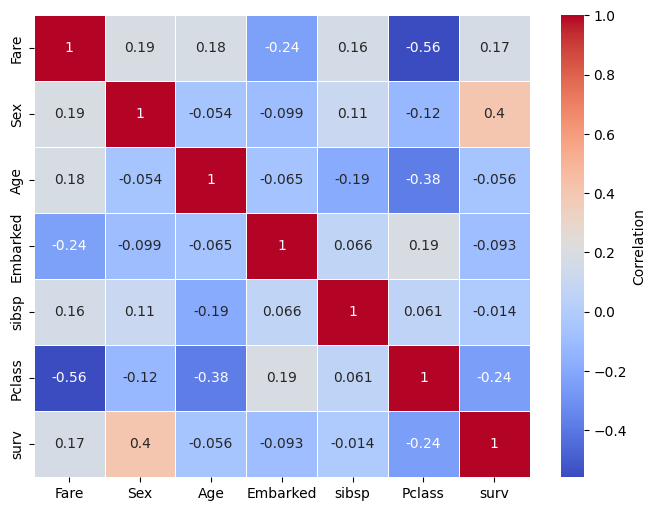

In [28]:
#and aplot of this correlation 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(trimmeddf.corr(), annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation'})

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'surv' is the target column, and the rest are features
X = df.drop("surv", axis=1)
y = df["surv"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format, which is the internal data structure used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params1 = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',         # use logloss as the evaluation metric
    'max_depth': 4,
    'learning_rate': 0.1,
   
}

params2 = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',         # use logloss as the evaluation metric
    'max_depth': 7,
    'learning_rate': 0.1,
    
}

params3 = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',         # use logloss as the evaluation metric
    'max_depth': 12,
    'learning_rate': 0.1,
    
}


model_1 = xgb.train(params1, dtrain, num_boost_round=10)

model_2 = xgb.train(params1, dtrain, num_boost_round=100)

model_3 = xgb.train(params1, dtrain, num_boost_round=1000)


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
     test        p1        p2        p3
0     0.0  0.102220  0.001303  0.000009
1     0.0  0.102220  0.005784  0.001847
2     0.0  0.102220  0.001657  0.000053
3     0.0  0.165671  0.090438  0.022520
4     0.0  0.102250  0.002313  0.002013
..    ...       ...       ...       ...
257   1.0  0.316539  0.609094  0.954050
258   0.0  0.471923  0.590453  0.947738
259   0.0  0.102250  0.001327  0.000317
260   0.0  0.712294  0.950002  0.998155
261   0.0  0.712294  0.897323  0.984914

[262 rows x 4 columns]


,test,p1,p2,p3
0,0.0,0.102220,0.001303,0.000009
1,0.0,0.102220,0.005784,0.001847
2,0.0,0.102220,0.001657,0.000053
3,0.0,0.165671,0.090438,0.022520
4,0.0,0.102250,0.002313,0.002013


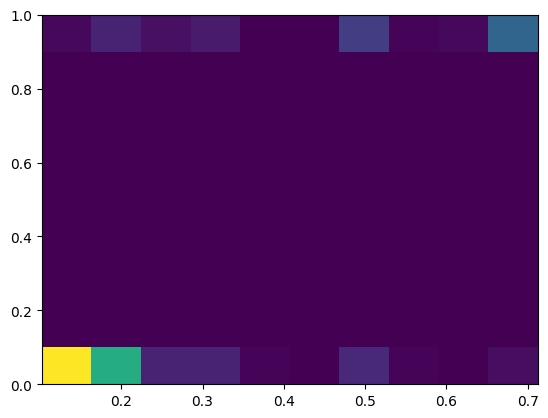

In [30]:
y_pred1 =  model_1.predict(dtest)
y_pred2 =  model_2.predict(dtest)
y_pred3 =  model_3.predict(dtest)

hy_pred1 = plt.hist(y_pred1,linewidth=2, edgecolor='blue',fill=False)
hy_pred2 = plt.hist(y_pred2,linewidth=2, edgecolor='green',fill=False)
hy_pred3 = plt.hist(y_pred3,linewidth=2, edgecolor='red',fill=False)

h2d_1 = plt.hist2d(y_pred1,y_test)
#print (y_test.surv)
y_test.head()
#print (y_test[surv])
print (type(y_pred1))
print (type(y_test))
y_tnp = y_test.to_numpy()
Test_array = np.concatenate((y_tnp.reshape(-1, 1), y_pred1.reshape(-1, 1),y_pred2.reshape(-1,1),y_pred3.reshape(-1,1)), axis=1)
#print (Test_array)

pd_test =  pd.DataFrame(Test_array)
pd_test.columns = ["test","p1","p2","p3"]
print (pd_test)
pd_test.head()

Text(0.5, 0, 'BDT score - trainning 1')

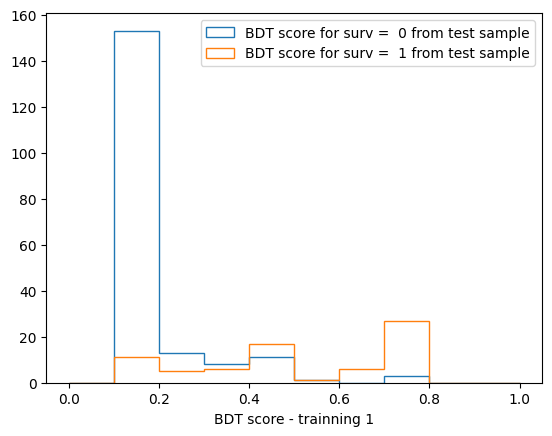

In [31]:
#Lets make some ROC curves out of the 3 categorization scores we constructed 


query = f"SELECT p1 FROM pd_test WHERE  test =0 ORDER BY p1 ASC;"
pd_cat0_pd1= psql.sqldf(query, locals())

query = f"SELECT p1  FROM pd_test WHERE  test =1 ORDER BY p1 ASC; "
pd_cat1_pd1= psql.sqldf(query, locals())


query = f"SELECT p2 FROM pd_test WHERE  test =0 ORDER BY p2 ASC;"
pd_cat0_pd2= psql.sqldf(query, locals())

query = f"SELECT p2  FROM pd_test WHERE  test =1 ORDER BY p2 ASC; "
pd_cat1_pd2= psql.sqldf(query, locals())


query = f"SELECT p3 FROM pd_test WHERE  test =0 ORDER BY p3 ASC;"
pd_cat0_pd3= psql.sqldf(query, locals())

query = f"SELECT p3  FROM pd_test WHERE  test =1 ORDER BY p3 ASC; "
pd_cat1_pd3= psql.sqldf(query, locals())


hpd1cat0 = plt.hist(pd_cat0_pd1,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  0 from test sample")
hpd1cat1 = plt.hist(pd_cat1_pd1,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  1 from test sample")
plt.legend()
plt.xlabel("BDT score - trainning 1")

Text(0.5, 0, 'BDT score - trainning 2')

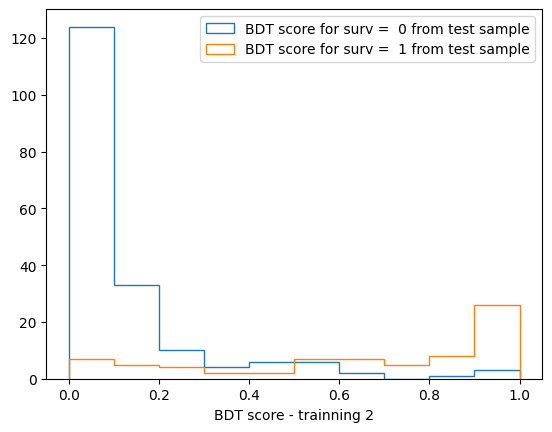

In [32]:
hpd2cat0 = plt.hist(pd_cat0_pd2,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  0 from test sample")
hpd2cat1 = plt.hist(pd_cat1_pd2,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  1 from test sample")
plt.legend()
plt.xlabel("BDT score - trainning 2")

(array([153.,   9.,   4.,   2.,   1.,   1.,   1.,   5.,   3.,  10.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), [<matplotlib.patches.Polygon object at 0x00000166DC8A9040>])


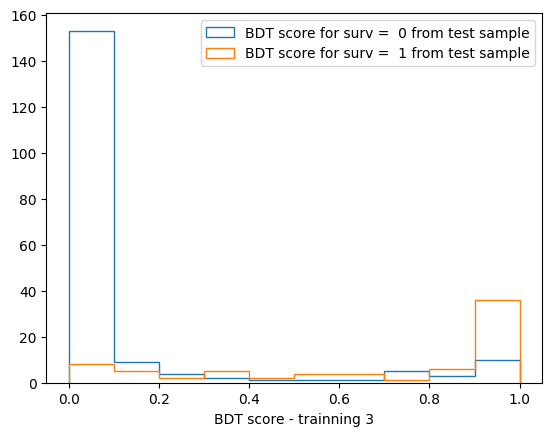

In [33]:
hpd3cat0 = plt.hist(pd_cat0_pd3,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  0 from test sample")
hpd3cat1 = plt.hist(pd_cat1_pd3,bins=10,histtype='step',range=[0,1],label="BDT score for surv =  1 from test sample")
plt.legend()
plt.xlabel("BDT score - trainning 3")
print (hpd3cat0)

0.5 cut efficiencies:  0.015873015873015872 0.4520547945205479
0.5 cut efficiencies:  0.031746031746031744 0.6301369863013698
0.5 cut efficiencies:  0.10052910052910052 0.6438356164383561


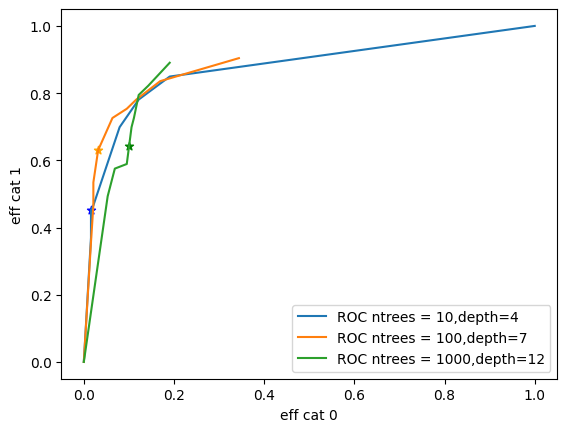

In [34]:
#Lets calculate the ROC curves for each of these 3 trainnings
import copy
def getROCar(histcat0,histcat1) : 

    
    
    sum0 =  np.sum(histcat0[0])  
    sum1 =  np.sum(histcat1[0])    
    #print (sum0,sum1)    
    effcat0n = histcat0[0]/sum0
    effcat1n = histcat1[0]/sum1
    
    effcat0 = copy.deepcopy(effcat0n)
    effcat1 = copy.deepcopy(effcat1n)

    #print (effcat0)
    effcat0  = [ np.sum(effcat0n[ind + 1:]) for ind,el in enumerate(effcat0n) ]
    effcat1  = [ np.sum(effcat1n[ind + 1:]) for ind,el in enumerate(effcat1n) ]
    
    print ("0.5 cut efficiencies: ",effcat0[5],effcat1[5])
    return effcat0,effcat1




effpd1cat0,effpd1cat1 = getROCar(hpd1cat0,hpd1cat1) 
roc1 = plt.plot(effpd1cat0,effpd1cat1,label='ROC ntrees = 10,depth=4')

effpd2cat0,effpd2cat1 = getROCar(hpd2cat0,hpd2cat1) 
roc2 = plt.plot(effpd2cat0,effpd2cat1,label='ROC ntrees = 100,depth=7')

effpd3cat0,effpd3cat1 = getROCar(hpd3cat0,hpd3cat1) 
roc3 = plt.plot(effpd3cat0,effpd3cat1,label='ROC ntrees = 1000,depth=12')
plt.legend()

plt.xlabel("eff cat 0")
plt.ylabel("eff cat 1")
plt.scatter(1-0.9841269841269842,1-0.547945205479452,marker='*', color='blue', label='Point on Curve 1')
plt.scatter(1-0.9682539682539683,1-0.36986301369863017,marker='*', color='orange', label='Point on Curve 1')
plt.scatter(1-0.8994708994708995,1-0.3561643835616439,marker='*', color='green', label='Point on Curve 1')

In [35]:
#the cut at 0.5

y_pred_binary1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
categorized1 =  [1 if pred > 0.5 else 0 for pred in y_pred1]

y_pred_binary2 = [1 if pred > 0.5 else 0 for pred in y_pred2]
categorized2 =  [1 if pred > 0.5 else 0 for pred in y_pred2]

y_pred_binary3 = [1 if pred > 0.5 else 0 for pred in y_pred3]
categorized3 =  [1 if pred > 0.5 else 0 for pred in y_pred3]

In [36]:
accuracy1 = accuracy_score(y_test, y_pred_binary1)
accuracy2 = accuracy_score(y_test, y_pred_binary2)
accuracy3 = accuracy_score(y_test, y_pred_binary3)
print (accuracy1,accuracy2,accuracy3)

0.8358778625954199 0.8778625954198473 0.8396946564885496
